# Libraries

In [1]:
import pickle
import pandas as pd
import seaborn as sns
from os.path import exists
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Loading the Files

Download the csv files into the `data/` directory.

train.csv shape is  (1697533, 9)
test.csv shape is  (212192, 2)
trainingSet head: 
        Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                     2   
1   354887  6303079709  A2I8RXJN80A2D2                     0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                     0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                     1   
4   475323  630574453X  A13NM1PES9OXVN                     2   

   HelpfulnessDenominator        Time  \
0                       2  1341014400   
1                       0  1168819200   
2                       0  1386201600   
3                       1  1348704000   
4                       3   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bitter

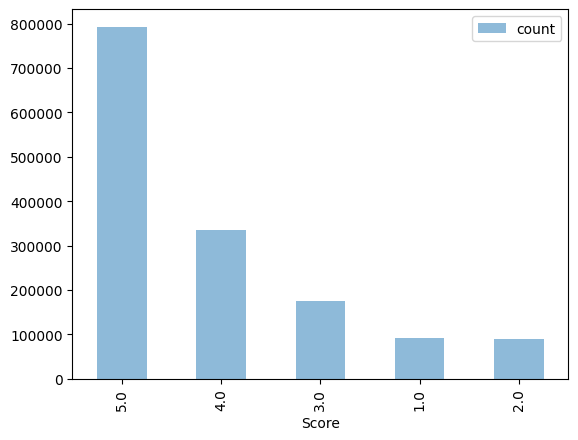


EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START


In [2]:
trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print("trainingSet head: ")

print(trainingSet.head())
print()
# Print all column names
print("Column titles:")
print(trainingSet.columns.tolist())
print()
print("testingSet head: ")
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.show()

print()
print("EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START")

# Adding Features

In [3]:
def add_features_to(df):
    # This is where you can do all your feature extraction

    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)

    # def get_sentiment_scores(text):

    #     analyzer = SentimentIntensityAnalyzer()
    #     scores = analyzer.polarity_scores(text)

    #     return scores['pos'], scores['neg']

    # df[['Positivity_Score', 'Negativity_Score']] = df['Text'].apply(get_sentiment_scores).apply(pd.Series)

    print(df.head())

    return df

# Load the feature extracted files if they've already been generated
if exists('./data/X_train.csv'):
    X_train = pd.read_csv("./data/X_train.csv")
if exists('./data/X_submission.csv'):
    X_submission = pd.read_csv("./data/X_submission.csv")

else:
    # Process the DataFrame
    train = add_features_to(trainingSet)

    # Merge on Id so that the submission set can have feature columns as well
    X_submission = pd.merge(train, testingSet, left_on='Id', right_on='Id')
    X_submission = X_submission.drop(columns=['Score_x'])
    X_submission = X_submission.rename(columns={'Score_y': 'Score'})

    # The training set is where the score is not null
    X_train =  train[train['Score'].notnull()]

    X_submission.to_csv("./data/X_submission.csv", index=False)
    X_train.to_csv("./data/X_train.csv", index=False)

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the sentiment analyzer once
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    if isinstance(text, str):  # Check if the text is a string
        scores = analyzer.polarity_scores(text)
        return scores['pos'], scores['neg']
    else:
        return 0, 0  # Return default scores for non-string inputs

# Ensure 'Summary' has no NaN values
X_train['Summary'] = X_train['Summary'].fillna('')
X_submission['Summary'] = X_submission['Summary'].fillna('')

# Apply the sentiment scoring
X_train[['Positivity_Score', 'Negativity_Score']] = X_train['Summary'].apply(get_sentiment_scores).apply(pd.Series)

X_submission[['Positivity_Score', 'Negativity_Score']] = X_submission['Summary'].apply(get_sentiment_scores).apply(pd.Series)

In [5]:
# X_train_merged = X_train.merge(trainingSet[['Id', 'Score']], on='Id', how='left')

In [6]:
# X_train_merged.head()
print(X_train.columns)
# print(X_train_merged.columns)
print(X_submission.columns)




Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'Score',
       'Helpfulness', 'Positivity_Score', 'Negativity_Score'],
      dtype='object')
Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'Helpfulness',
       'Score', 'Positivity_Score', 'Negativity_Score'],
      dtype='object')


# Sample + Split into training and testing set

In [7]:
# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train.drop(columns=['Score']),
    X_train['Score'],
    test_size=1/4.0,
    random_state=0
)

In [8]:
X_train.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Helpfulness,Positivity_Score,Negativity_Score
131283,430123,6304628153,A1KD93LN4BHUT3,13,13,1120608000,Excellent WWII-Era Retelling of The Scarlet Pi...,A&E; used to show this old movie every so ofte...,1.00,0.381,0.0
1202017,839984,B0002M5U6A,A3PXY2C0L3KLK,1,1,1343088000,Forgettable camp,Not as good as Rankin/Bass other specials. The...,1.00,0.000,0.0
511808,320579,6302561868,AV1KYJXHOWPMD,6,10,1155600000,Skip it.,"Aliens was the perfect conclusion, but this ru...",0.60,0.000,0.0
955172,1600915,B009OCR1OI,A14SX0UQVZ9IU0,3,4,1374451200,"""Dense, voyeuristic and tangible...""","American screenwriter, producer and director C...",0.75,0.000,0.0
735507,1326832,B0035Q636Q,A2ZD0ZCU166Z1J,0,0,1356566400,Classic Quad Set 2,"I bought two of these sets, one for me and one...",0.00,0.000,0.0


# Feature Selection

In [9]:
# Print the columns of the X_submission DataFrame
print(X_submission.columns)


Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'Helpfulness',
       'Score', 'Positivity_Score', 'Negativity_Score'],
      dtype='object')


In [10]:
features = ['Helpfulness','Positivity_Score', 'Negativity_Score']

X_train_select = X_train[features]
X_test_select = X_test[features]
X_submission_select = X_submission[features]

# Model Creation

In [11]:
# # Learn the model
# model = KNeighborsClassifier(n_neighbors=7).fit(X_train_select, Y_train)

# # Predict the score using the model
# Y_test_predictions = model.predict(X_test_select)

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=40)

model.fit(X_train_select,Y_train)

Y_test_predictions2 = model.predict(X_test_select)

# Model Evaluation

Accuracy on testing set =  0.5435858629381477


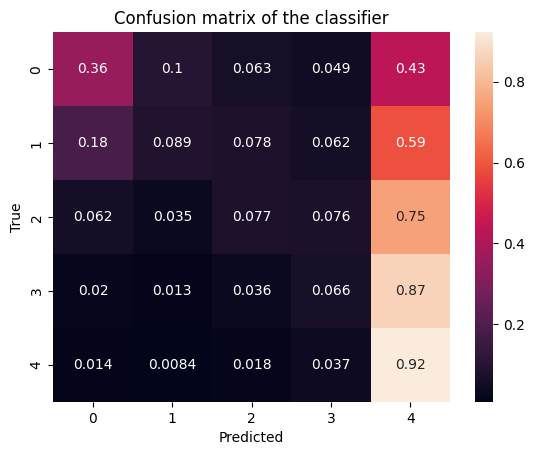

In [13]:
# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions2))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions2, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create submission file

In [14]:
# Create the submission file
X_submission['Score'] = model.predict(X_submission_select)
submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)